* ### Import Required Libraries

In [25]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

%pip install catboost
%pip install scikit-optimize

# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')


Completed.


In [26]:
# data = pd.read_csv(r"C:\Users\antol\Downloads\Cardio_Train.csv")

cardio = pd.read_csv("Cardio_Train-2.csv")
cardio

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


* ### Dataset information

In [27]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [28]:
cardio.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [29]:
x = cardio['Age']
x

0          9.0
1          7.0
2          9.0
3         11.0
4         11.0
          ... 
253675     5.0
253676    11.0
253677     2.0
253678     7.0
253679     9.0
Name: Age, Length: 253680, dtype: float64

In [30]:
cardio.shape

(253680, 22)

* ### Dataset class statistics

In [31]:
cardio['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [32]:
cardio.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

In [33]:
cardio.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [34]:
X = cardio.iloc[:, 1:].values # get all record, for each record get all column exclude the first (label) column => independent variable
y = cardio.iloc[:, 0].values # get all record, for each record only get the first column => dependent variable or the label need predict

In [35]:
y

array([0., 0., 0., ..., 0., 0., 1.])

In [36]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
y

array([0, 0, 0, ..., 0, 0, 1])

### Code Explanation:

label_encoder = LabelEncoder(): This line creates a LabelEncoder object.

y = label_encoder.fit_transform(y): This line performs two steps:

fit: It learns how to map labels to numbers based on the data in y. transform: It transforms the labels in y into numerical form based on the learned mapping. The result is a new numpy array y, where each original string label in y has been converted into a unique integer.

This process is particularly useful when working with machine learning algorithms, many of which require or perform better with numerical data. Specifically, LabelEncoder is commonly used for encoding labels in classification tasks.

In [37]:
X.shape

(253680, 21)

In [38]:
y.shape

(253680,)

In [39]:
# split the dataset to the train and test set, prepare for training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


## Start step build and training model

In [40]:
# define the dictionary to store all results
results = {}

### 1. Logistic regresssion model

In [85]:
%%time
training_start_time = time.time()

logistic_model = LogisticRegression() # call model from lib
logistic_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = logistic_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Logistic Regression model'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 3.93 s, sys: 1.13 s, total: 5.05 s
Wall time: 2.64 s


### The results information

In [86]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x79316f09fac0>
accuracy:  90.6874802901293
precision:  87.76020911868257
recall:  90.6874802901293
f1_score:  88.07114477753406
training time total:  2.5127768516540527


### Confusion matrix heatmap

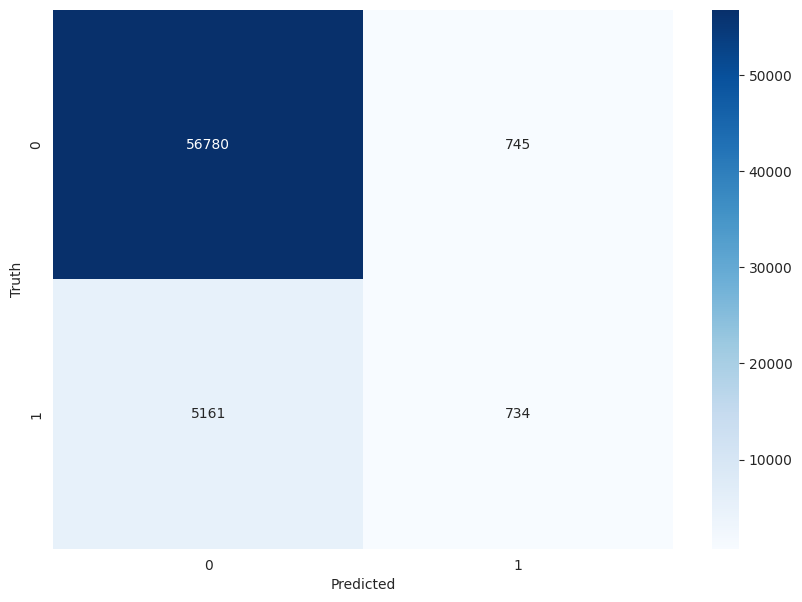

In [87]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

### Visualize the accuracy, precision, recall, F1_score

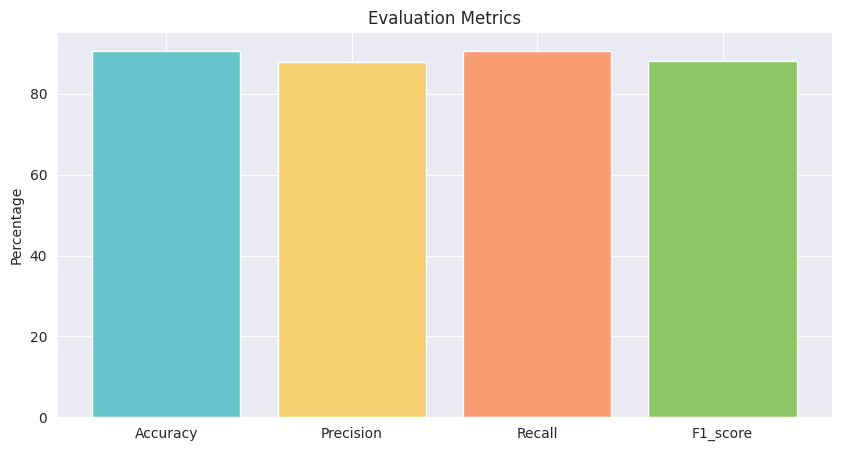

In [88]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [89]:
### 1. Logistic regresssion model
print("Completed")

Completed


### 2. k Nearest Neighbors (k-NN)

In [46]:
%%time
training_start_time = time.time()

knn_model = KNeighborsClassifier(n_neighbors=3) # call model from lib
knn_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = knn_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 1min 59s, sys: 380 ms, total: 1min 59s
Wall time: 1min 35s


### The results information

In [47]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x79316f09fac0>
accuracy:  88.67076631977294
precision:  85.82626608349996
recall:  88.67076631977294
f1_score:  86.99001083216513
training time total:  95.27837944030762


### Confusion matrix heatmap

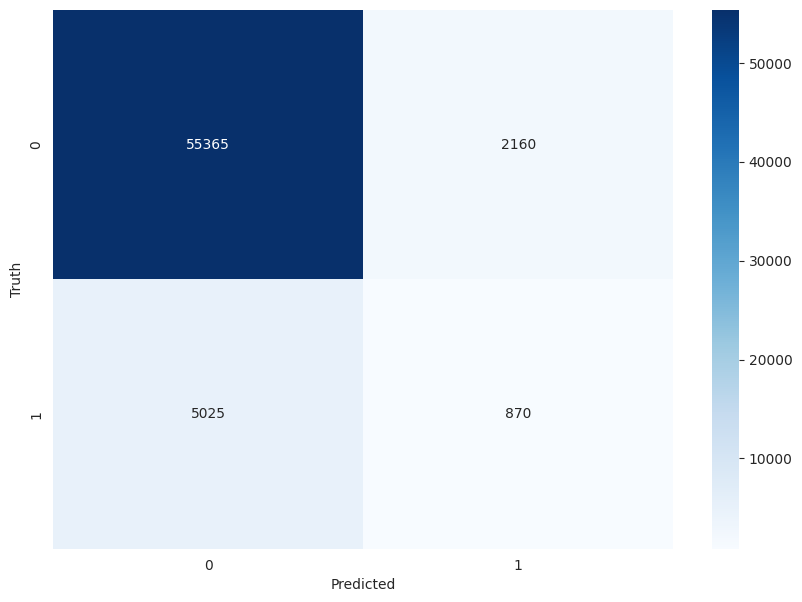

In [48]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

### Visualize the accuracy, precision, recall, F1_score

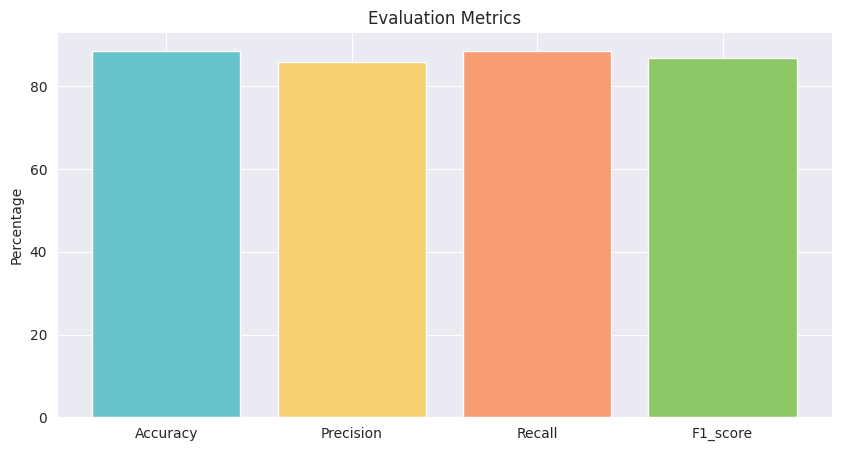

In [49]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [50]:
### 2. k Nearest Neighbors (k-NN)
print('Completed')

Completed


### 3. Decision Tree

In [51]:
%%time
training_start_time = time.time()

decision_tree_model = DecisionTreeClassifier() # call model from lib
decision_tree_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = decision_tree_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Desision Tree'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 1.19 s, sys: 4.99 ms, total: 1.19 s
Wall time: 1.2 s


### The results information

In [52]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x79316f09fac0>
accuracy:  85.02680542415642
precision:  86.02549371138655
recall:  85.02680542415642
f1_score:  85.50836557112932
training time total:  1.1271982192993164


### Confusion matrix heatmap

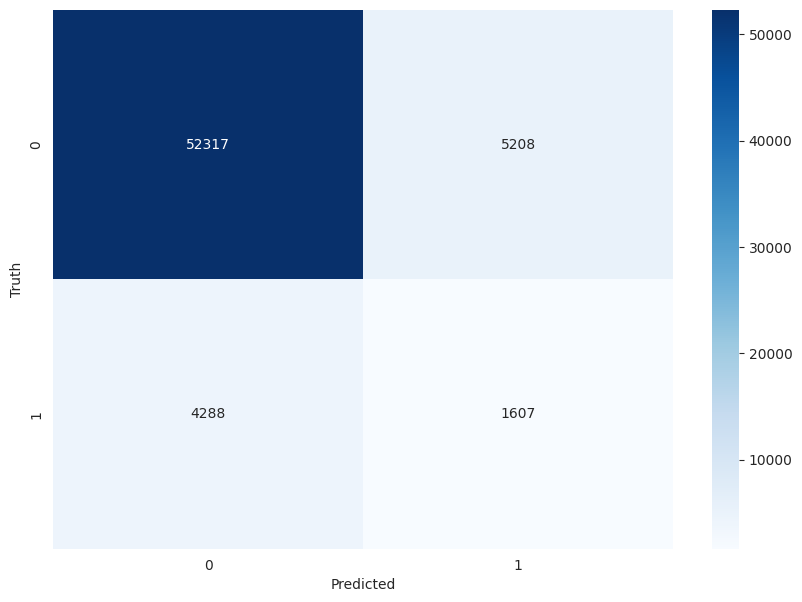

In [53]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

### Visualize the accuracy, precision, recall, F1_score

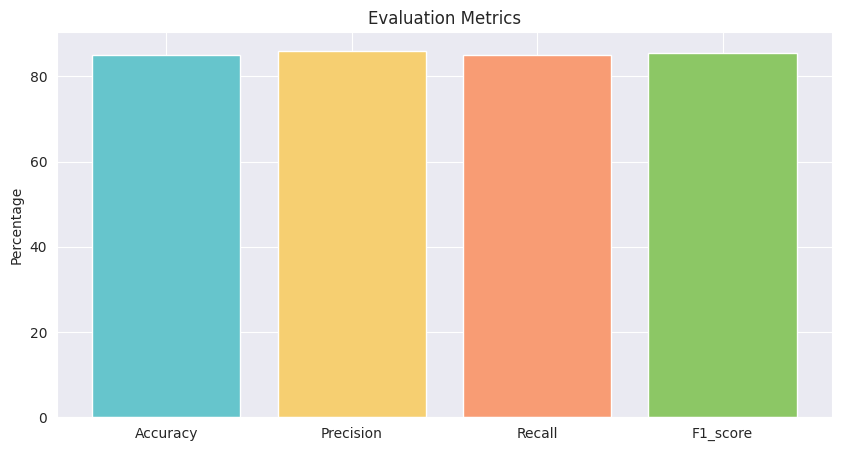

In [54]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [55]:
### 3. Decision Tree
print('Completed')

Completed


### 4. Random forest

In [56]:
%%time
training_start_time = time.time()

random_forest_model = RandomForestClassifier() # call model from lib
random_forest_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = random_forest_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Random forest'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 24.4 s, sys: 461 ms, total: 24.9 s
Wall time: 25 s


### The results information

In [57]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x79316f09fac0>
accuracy:  90.34847051403344
precision:  87.00080471902616
recall:  90.34847051403344
f1_score:  87.70573337685416
training time total:  24.915436267852783


### Confusion matrix heatmap

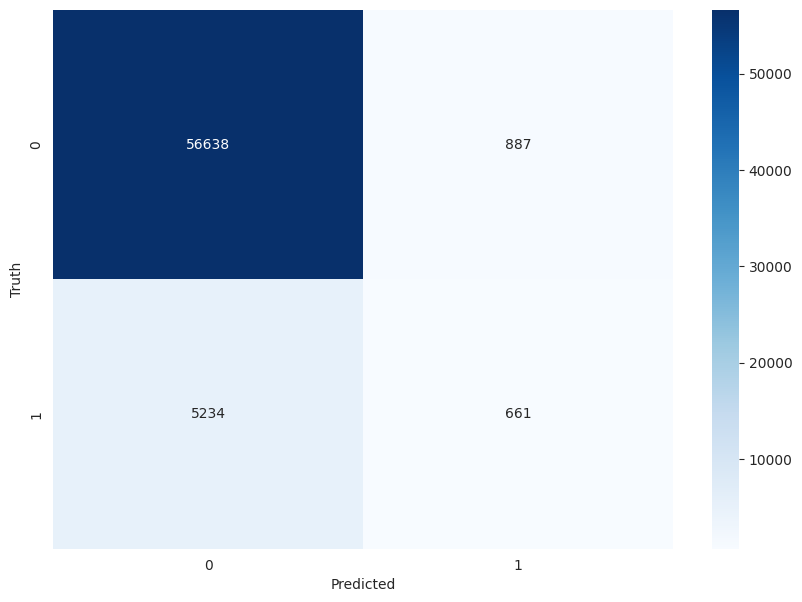

In [58]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

### Visualize the accuracy, precision, recall, F1_score

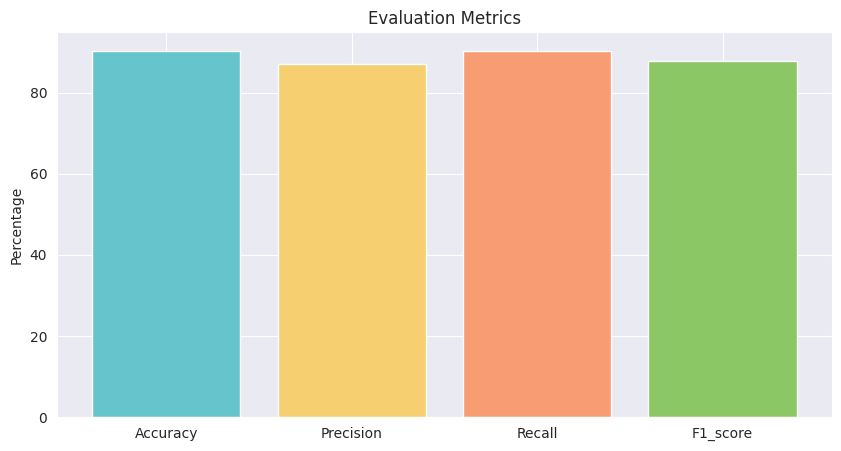

In [59]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [60]:
### 4. Random forest
print('Completed')

Completed


### 5. Neural networks

In [61]:
%%time
training_start_time = time.time()

neural_network_model = MLPClassifier() # call model from lib
neural_network_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_pred = neural_network_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Neural Networks (Multi-layer Perceptron)'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
    training_time_total
]

CPU times: user 2min 56s, sys: 1min 41s, total: 4min 38s
Wall time: 2min 52s


### The results information

In [62]:
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x79316f09fac0>
accuracy:  90.75685903500474
precision:  87.99080750262411
recall:  90.75685903500474
f1_score:  88.26452083525933
training time total:  172.41807627677917


### Confusion matrix heatmap

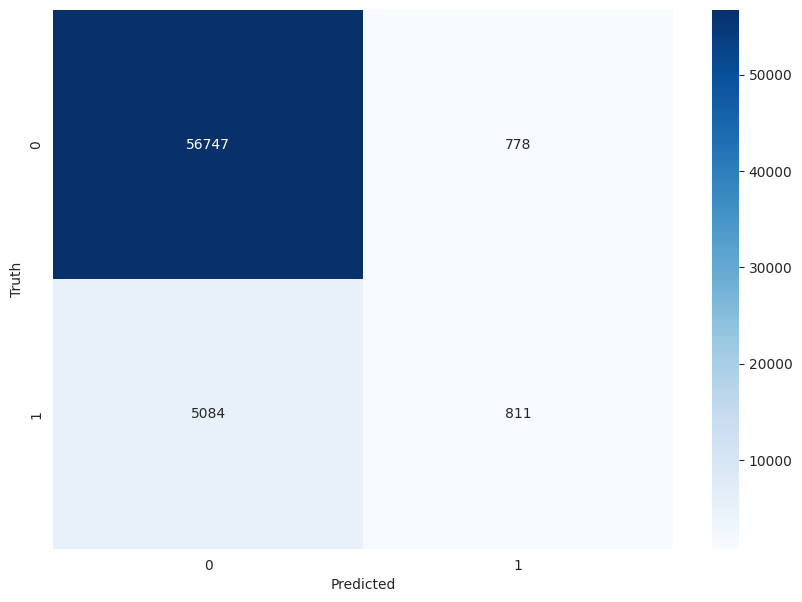

In [63]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

### Visualize the accuracy, precision, recall, F1_score

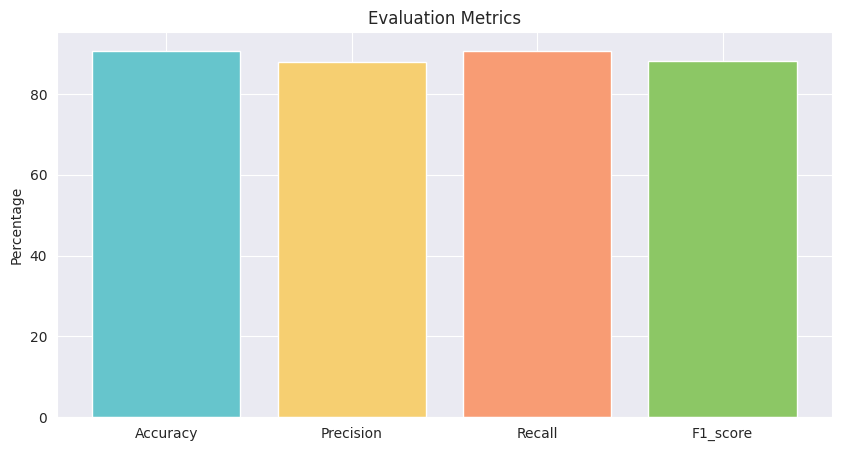

In [64]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [65]:
### 5. Neural networks
print('Completed')

Completed


In [66]:
results

{'Logistic Regression model': [0.906874802901293,
  0.8776020911868256,
  0.906874802901293,
  0.8807114477753406,
  5.595244646072388],
 'k Nearest Neighbors (k-NN)': [0.8867076631977294,
  0.8582626608349996,
  0.8867076631977294,
  0.8699001083216513,
  95.27837944030762],
 'Desision Tree': [0.8502680542415642,
  0.8602549371138655,
  0.8502680542415642,
  0.8550836557112932,
  1.1271982192993164],
 'Random forest': [0.9034847051403343,
  0.8700080471902616,
  0.9034847051403343,
  0.8770573337685416,
  24.915436267852783],
 'Neural Networks (Multi-layer Perceptron)': [0.9075685903500473,
  0.8799080750262411,
  0.9075685903500473,
  0.8826452083525933,
  172.41807627677917]}

## Compare results

In [67]:
dataframe_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.906875,0.877602,0.906875,0.880711,5.595245
k Nearest Neighbors (k-NN),0.886708,0.858263,0.886708,0.869900,95.278379
Desision Tree,0.850268,0.860255,0.850268,0.855084,1.127198
Random forest,0.903485,0.870008,0.903485,0.877057,24.915436
Neural Networks (Multi-layer Perceptron),0.907569,0.879908,0.907569,0.882645,172.418076


In [68]:
dataframe_results.drop('Training time total', axis=1, inplace=True)

In [69]:
def plot_cv_score(frame_scores, cmap):
    fig, ax  = plt.subplots(1,1, figsize = (14,5))

    frame_scores.plot.bar(ax = ax, cmap = cmap, edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_title("Cross validation Scores for each model")
    plt.xticks(rotation = 0)

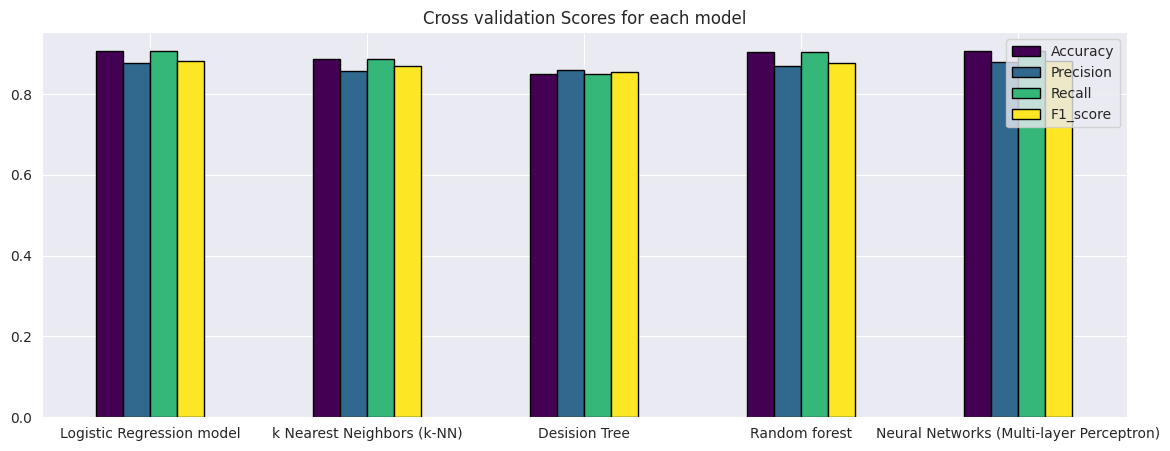

In [70]:
plot_cv_score(dataframe_results, 'viridis')

In [71]:
cardio.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [91]:
new_data = pd.DataFrame({
      "HighBP": [1],
      "HighChol": [0],
      "CholCheck": [1],
      "BMI": [1],
      "Smoker": [1],
      "Stroke": [0],
      "Diabetes": [0],
      "PhysActivity": [1],
      "Fruits": [1],
      "Veggies": [1],
      "HvyAlcoholConsump": [1],
      "AnyHealthcare": [1],
      "NoDocbcCost": [0],
      "GenHlth": [5],
      "MentHlth": [20],
      "PhysHlth": [30],
      "DiffWalk": [1],
      "Sex": [1],
      "Age": [45],
      "Education": [5],
      "Income": [2]
  })

predicted_value = logistic_model.predict(new_data)[0]
print("Predicted Value per Logistic Regression: %.2f" % predicted_value)
predicted_value = knn_model.predict(new_data)[0]
print("Predicted Value per KNN: %.2f" % predicted_value)
predicted_value = random_forest_model.predict(new_data)[0]
print("Predicted Value per Random Forest: %.2f" % predicted_value)
predicted_value = decision_tree_model.predict(new_data)[0]
print("Predicted Value per Decision Tree: %.2f" % predicted_value)
predicted_value = neural_network_model.predict(new_data)[0]
print("Predicted Value per Neural Network: %.2f" % predicted_value)

Predicted Value per Logistic Regression: 1.00
Predicted Value per KNN: 0.00
Predicted Value per Random Forest: 0.00
Predicted Value per Decision Tree: 0.00
Predicted Value per Neural Network: 0.00
